# Lesson 1 - CNN Image Classification
## Diaz Agasatya - Data Institute Deep Learning Part 1
The general outcome of this lesson is to be able to run a 34 CNN resnet from fastai library on Google Compute Platform GPU to train a model to classify images.

First of all every notebook should start which these following three lines. The first line will ensure to reload any libraries that will be used in this notebook, the second line will autoreload, and the last line will reload images and charts in the notebook.

In this lesson, we will train the Resnet34 model to for a multiclassification planet dataset.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In this lesson, we will use the famous fastai V1 library which are build on top of Pytorch 1.0. This library consists many architecture models that are re-useable and re-trainable for our purpose.

In [2]:
from fastai import *
from fastai.vision import *

For safety reasons, if you are using a computer with unusually small GPU, please change the batchsize to the second line.

In [3]:
batch_size = 64
# batch_size = 16

## Data Extraction
Thankfully FastAi library has a build id tar extractor method that will take in a URL as an argument to download the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



There are many URLs provided in FastAI library that can be used at our disposal for this purpose, please refer to the documentation below to choose your own data for training.

In [5]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  CIFAR = 'http://files.fast.ai/data/examples/cifar10'
 |  
 |  DOGS = 'http://files.fast.ai/data/examples/dogscats'
 |  
 |  HUMAN_NUMBERS = 'http://files.fast.ai/data/examples/human_numbers'
 |  
 |  IMDB_SAMPLE = 'http://files.fast.ai/data/examples/imdb_sample'
 |  
 |  LOCAL_PATH = PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/d...
 |  
 |  ML_SAMPLE = 'http://files.fast.ai/data/examples/movie_lens_sample'
 |  
 |  MNIST = 'https://s3.amazonaws.com/fast-ai-imageclas/mnist_png'
 |  
 |  MNIST_SAMPLE = 'http://file

Initiate the path to the MNIST digits datasets from FastAi URLs

In [6]:
planets = untar_data(URLs.PLANET_SAMPLE)

The labeling of the files tells us taht each image has one or more tags, seperated by space.

In [7]:
df = pd.read_csv(planets/'labels.csv')
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


Insert the data into an ImageDataBunch Object with all of the formatting needed.

In [8]:
data = ImageDataBunch.from_csv(planets, folder='train', size=224, suffix='.jpg',
                              ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

Print the batch of the data below to see what we are working with.

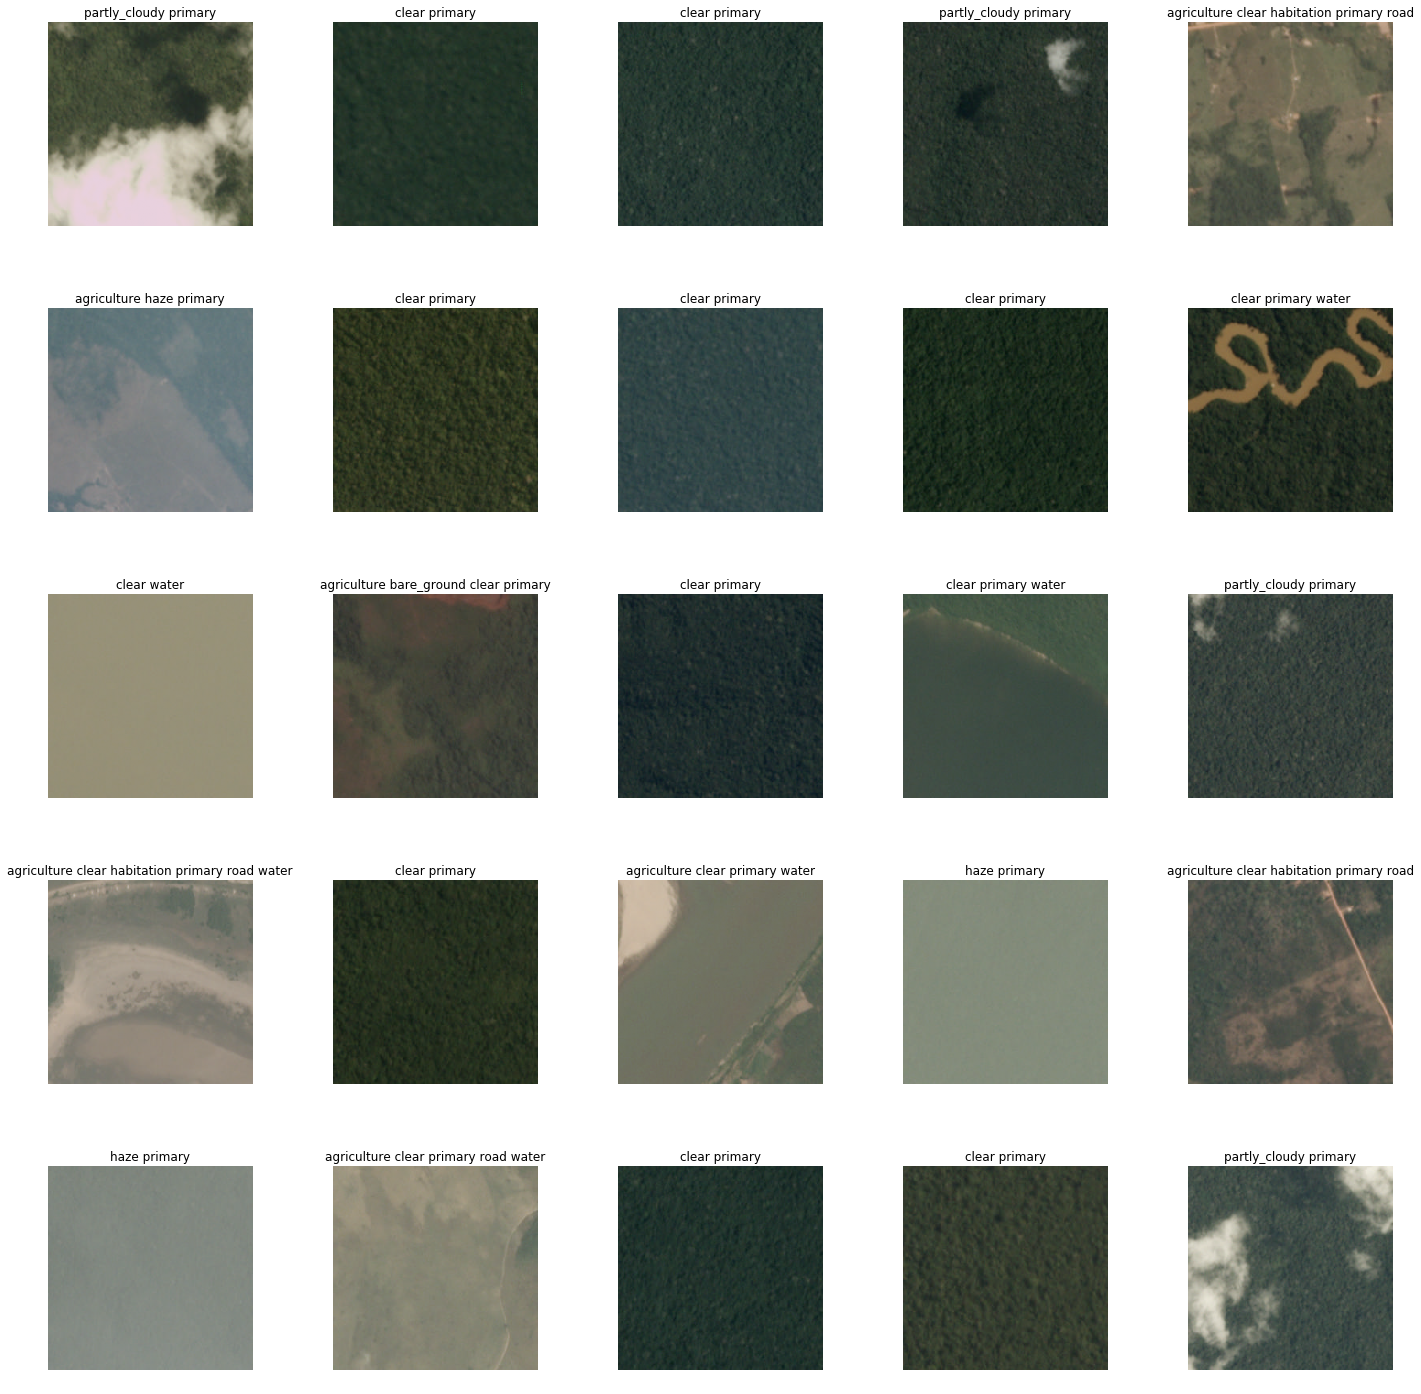

In [10]:
data.show_batch(rows=5, figsize=(20,20), is_train=False)

## Let's Train!
We will use resnet35 model to classify the different types of planet habitation. The code below will initiate the 34 Layer Convolutional Neural Network, showing the error_rates. This model will be trained for 4 epochs.

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

Total time: 00:25
epoch  train_loss  valid_loss  error_rate
1      4.450278    4.350905    0.857924    (00:08)
2      3.445865    4.014711    0.765027    (00:05)
3      2.852590    2.954889    0.557377    (00:05)
4      2.493634    2.519103    0.519126    (00:05)



As we can tell, the error rate is quite high due to the fact that there are only a small dataset to train the model and having a very specific images for different labels. In this case let's train the model in 20 epochs and see how much the error rate decreases over cycles.

In [13]:
learn.save('stage-1-34')

In [14]:
learn.unfreeze()
learn.fit_one_cycle(15)

Total time: 02:21
epoch  train_loss  valid_loss  error_rate
1      1.873953    2.366780    0.486339    (00:07)
2      1.757624    2.372206    0.519126    (00:06)
3      1.693951    2.673274    0.535519    (00:06)
4      1.644695    2.797503    0.540984    (00:06)
5      1.597627    2.860204    0.535519    (00:06)
6      1.597180    2.682178    0.508197    (00:06)
7      1.569227    2.772196    0.557377    (00:07)
8      1.522243    3.072035    0.551913    (00:06)
9      1.465632    2.284804    0.497268    (00:06)
10     1.399045    4.288753    0.617486    (00:07)
11     1.320242    2.185658    0.469945    (00:07)
12     1.234900    2.531893    0.469945    (00:07)
13     1.127559    2.515364    0.508197    (00:07)
14     1.016116    2.209000    0.469945    (00:06)
15     0.905355    2.168621    0.475410    (00:07)
16     0.804562    2.228179    0.442623    (00:07)
17     0.721394    2.254862    0.464481    (00:07)
18     0.650775    2.235091    0.459016    (00:07)
19     0.584192    2.2

## Unfreezing, Fine-Tuning and Learning Rates
This is the part where most of deep learning engineer are mostly in. here we can use fastai's build in method lr_find() to see the relationship of the model towards the error rate with using variaty of learning rates. Once we find the best learning rate for this particular model we can see a significant difference in the error_rate of our model.

In [15]:
learn.save('stage-2-34')

In [16]:
learn.load('stage-2-34')
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


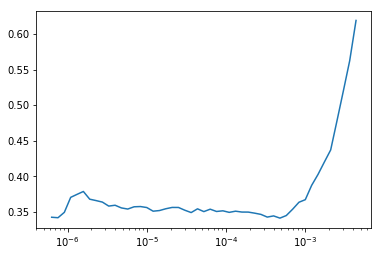

In [17]:
learn.recorder.plot()

We can see from the graph above that the best learning rate for this particular model is between 10^-6 to 10^-3. Let's apply this learning rate model to the learning cycles

In [19]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

Total time: 00:28
epoch  train_loss  valid_loss  error_rate
1      0.318603    2.238350    0.431694    (00:06)
2      0.315328    2.253585    0.442623    (00:06)
3      0.302774    2.241395    0.448087    (00:07)
4      0.287441    2.243001    0.437158    (00:07)



It's obvious that the error_rate is not decreasing significantly. Let's check the confusions of our model.

# Results
We can interpret the model's result below using the build in ClassificationInterpretation Class from FastAi library. This Object will create a visualization of the most frequent re-occuring error prediction from the model into a matrix or a graph. By looking at the figure representation we can conclude the behavior of our model, was it doing what we are expected or otherwise.

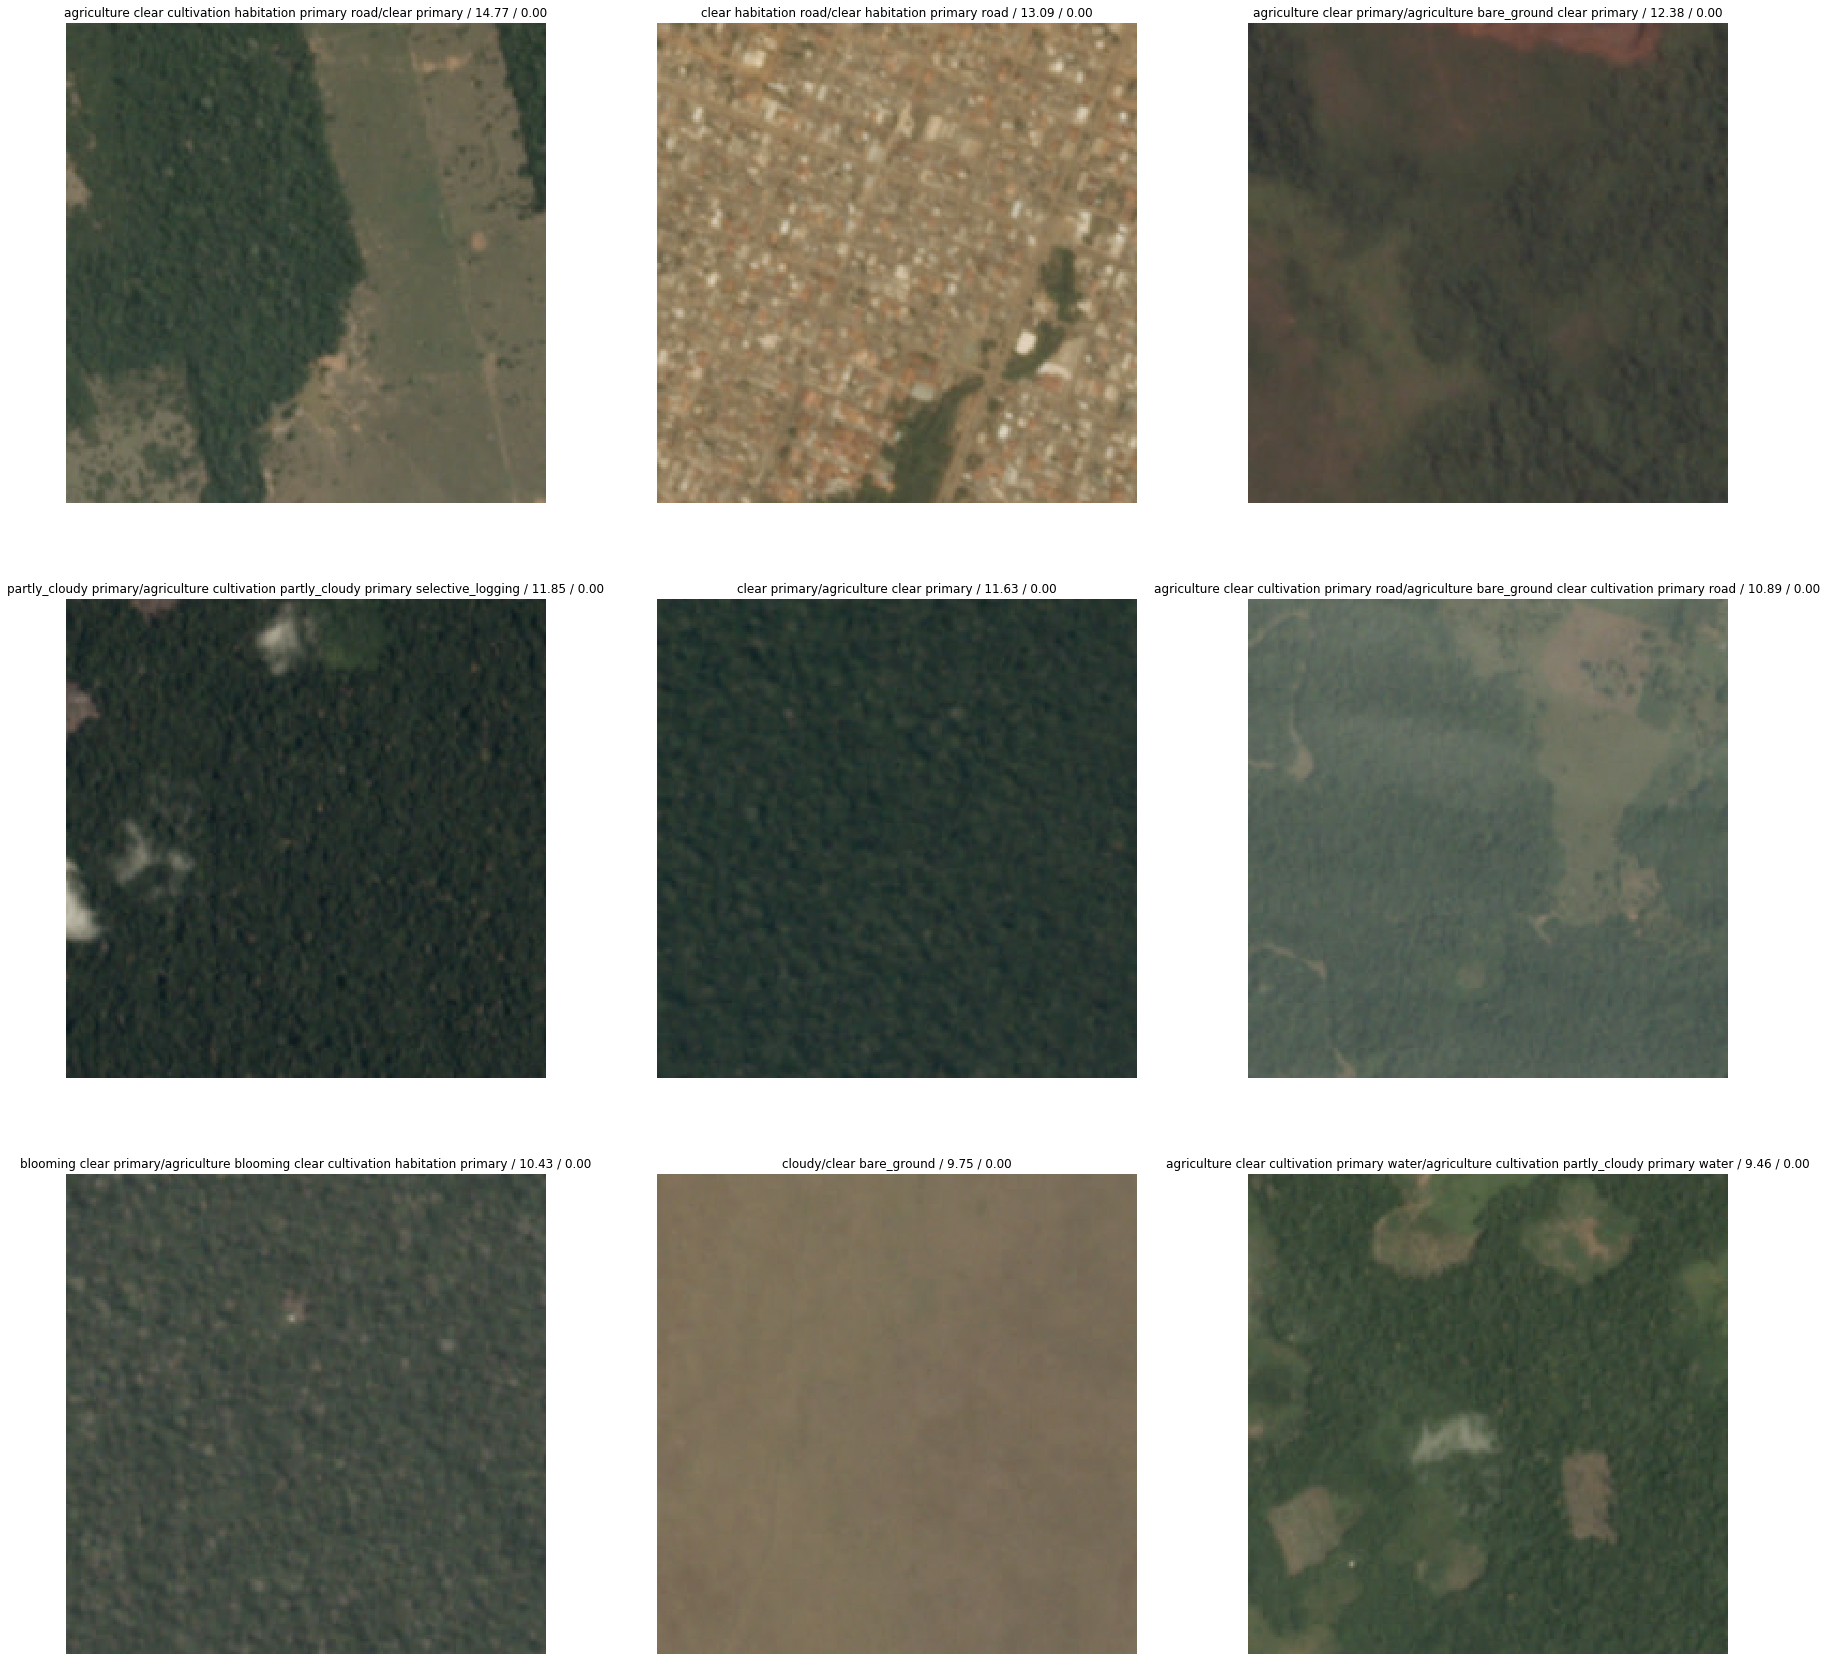

In [29]:
learn.save('stage-3-34')
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_top_losses(9, figsize=(30,30))

In [24]:
doc(interpretation.plot_top_losses)

plot_top_losses [source] plot_top_losses ( k , largest = True , figsize = (12, 12) ) 
 
 Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

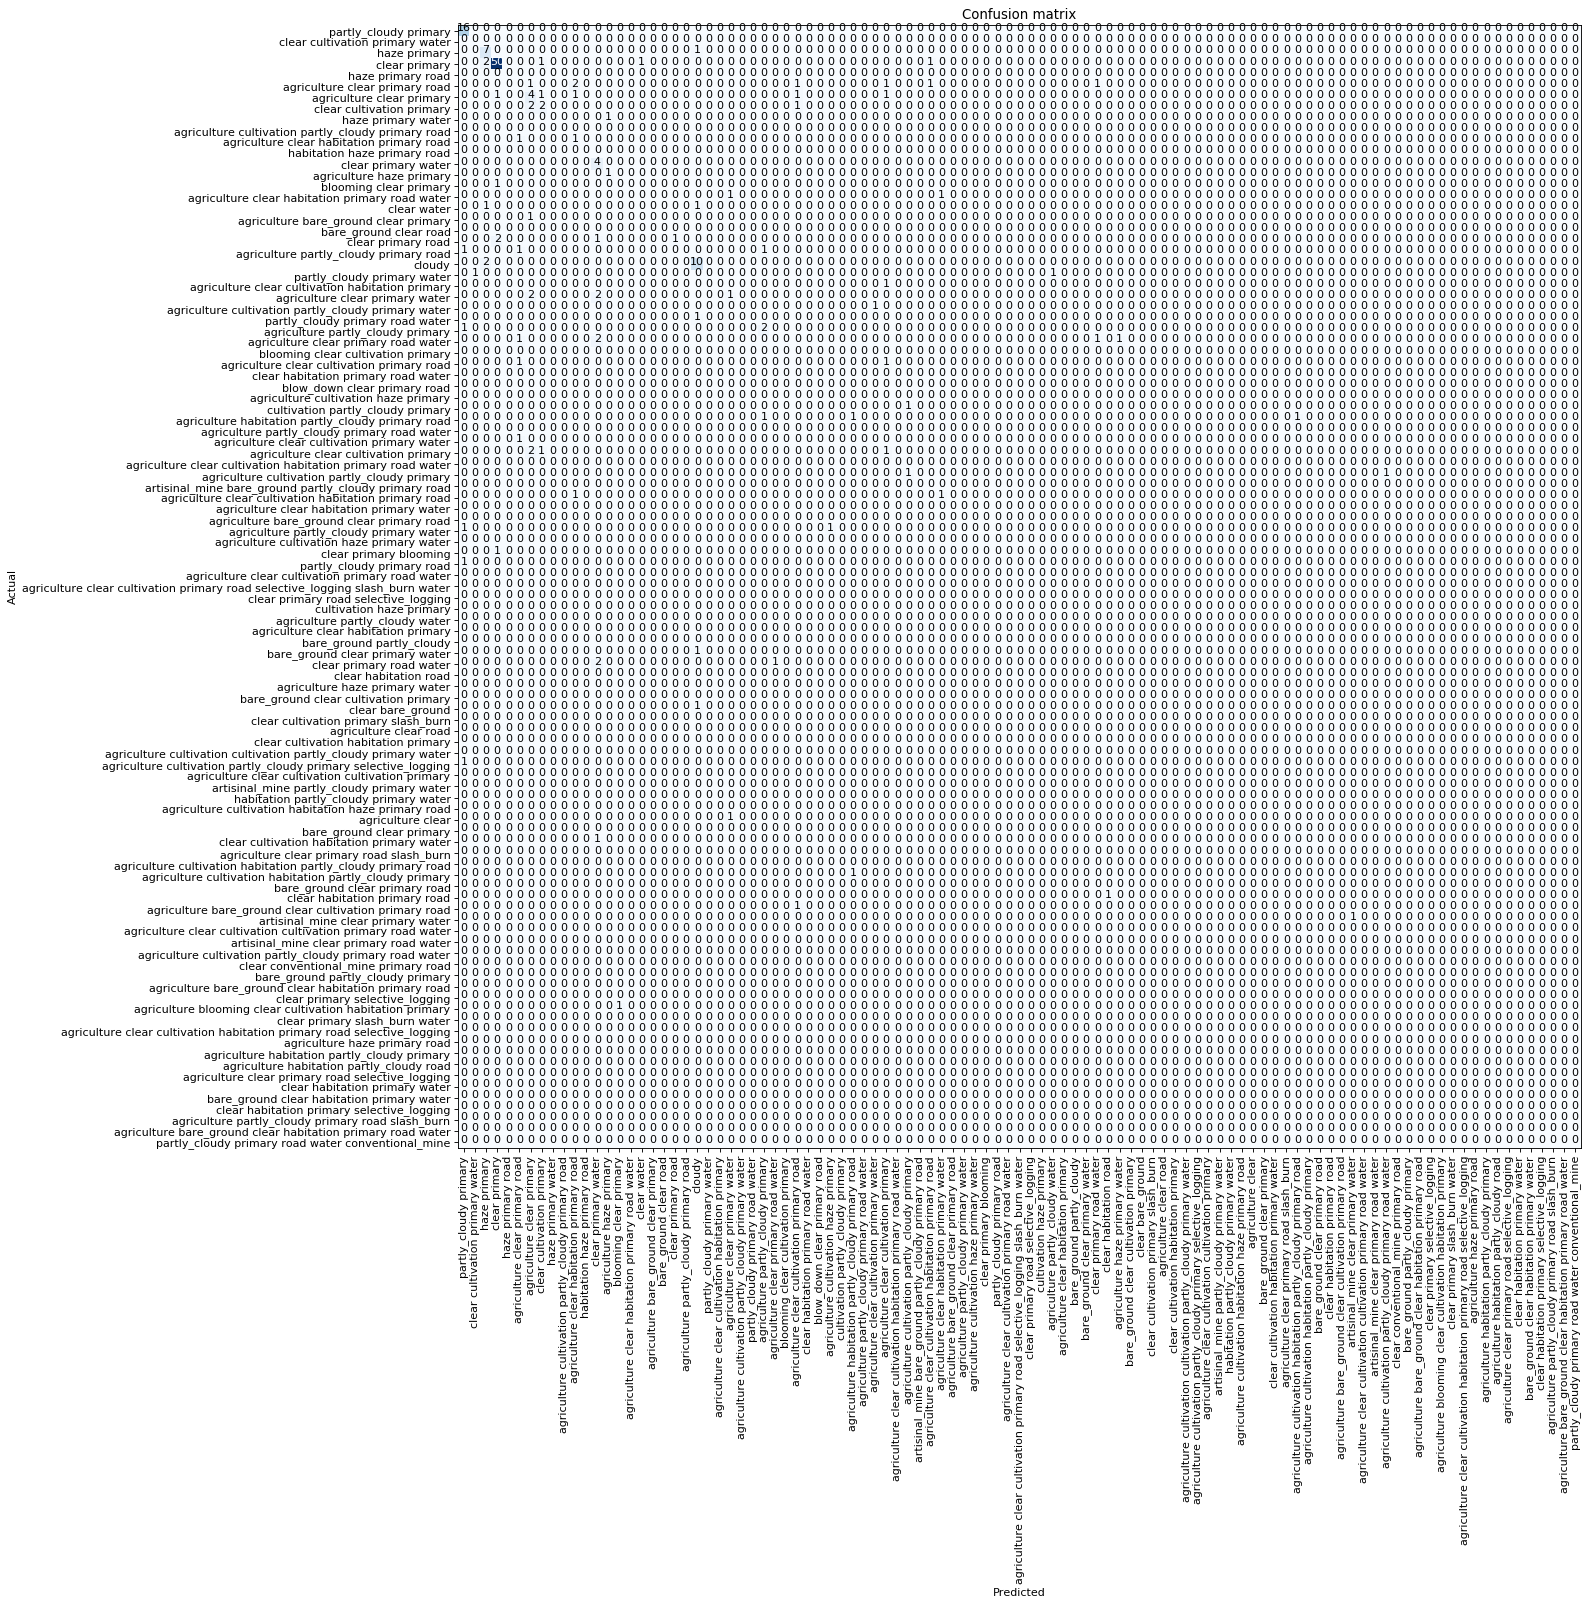

In [32]:
interpretation.plot_confusion_matrix(figsize=(20,20), dpi=80)

In [71]:
interpretation.most_confused(min_val=2)

[('agriculture clear primary road',
  'agriculture clear habitation primary road',
  3),
 ('agriculture clear primary', 'agriculture clear cultivation primary', 3),
 ('agriculture clear habitation primary road',
  'agriculture clear primary road',
  3)]

From the result above, we can see the confusion made by our model that was re-occured at least twice during the training process. If we look at the confusion matrix, most of the images are not predicted correctly. This must be the result of not having a validation dataset. 